贝叶斯新闻分类任务:根据文章的内容来进行类别的划分

步骤

①文本分词 ：通常我们处理的都是词而不是一篇文章

②构建文本特征：用TF-IDF ：提取关键词(获取停用词 ：停用词对分类没有帮助并且会产生影响，因此在提取关键词时要舍弃停用词)
  
③贝叶斯分类：基于多项式朴素贝叶斯算法来完成最终的分类任务

## 1.数据获取/切分

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 导入数据
data= pd.read_csv('data.txt',sep='\t',names=['类别','新闻标题','网址','新闻内容'])
data.head()

,类别,新闻标题,网址,新闻内容
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [3]:
# 查看数据集分布情况:是否均衡，是否有空缺值
data.info()
data['类别'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   类别      5000 non-null   object
 1   新闻标题    5000 non-null   object
 2   网址      5000 non-null   object
 3   新闻内容    5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


时尚    500
体育    500
财经    500
军事    500
教育    500
科技    500
汽车    500
娱乐    500
健康    500
文化    500
Name: 类别, dtype: int64

In [4]:
#数据集标签制作
# la=list(data['类别'].value_counts().index)
# ra=range(len(la))
# maping=dict(zip(la,ra))
# data['类别1']=data['类别']
# data['类别']=data['类别'].map(maping)

In [5]:
# 获取x,y并把数据分为训练集和测试集
from sklearn.model_selection import train_test_split
x=data['新闻内容']
y=data['类别']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## 2.数据处理—使用结吧分词器分词

In [6]:
#  导入分词的包
import jieba
#  没有的话需要提前安装
# pip install jieba

In [24]:
# 举例（查看分词效果）
nwes='这两天，成都地摊火了、武汉夜市开了，久违的烟火气在各地渐渐升腾'
nwes_fenci=jieba.lcut(nwes)
# 将分词结果连接成字符串,用空格分隔
nwes_fenci_str=' '.join(jieba.lcut(nwes))
nwes_fenci  ,   nwes_fenci_str

(['这',
  '两天',
  '，',
  '成都',
  '地摊',
  '火',
  '了',
  '、',
  '武汉',
  '夜市',
  '开',
  '了',
  '，',
  '久违',
  '的',
  '烟火',
  '气',
  '在',
  '各地',
  '渐渐',
  '升腾'],
 '这 两天 ， 成都 地摊 火 了 、 武汉 夜市 开 了 ， 久违 的 烟火 气 在 各地 渐渐 升腾')

In [8]:
x_train

2858    新华网北京６月１４日电（记者廖翊）“我们曾经用身躯亲吻精神的花瓣，我们曾经用心灵编织理想的花...
1559    美国科学家称，刷牙不彻底导致的牙菌斑、牙周炎问题可能加大患癌症死亡的风险。一项研究更显示，严...
1441    加拿大黑莓手机制造商ＲＩＭ的首席执行官托尔斯滕·海因斯当地时间３日表示，ＲＩＭ并没有遇到任何...
2179    对于西班牙足球来说这是史诗般的一夜，史无前例地拿到了三冠王的辉煌，４年之间３度捧起大赛的冠军...
1390    昨天，三星在北京发布了一款全球最薄的笔记本电脑产品，厚度仅为１２．９毫米，小于目前在售的Ｍａ...
                              ...                        
4931    早期的人类其实和动物没什么两样，过着饮血菇毛的生活。６阅鞘钡奈颐抢此担性行为与异性只是为了传...
3264    据新华社上海６月２８日电　（记者许晓青）我国著名电影表演艺术家张瑞芳２８日２１点３８分在上海...
1653    敏感性皮肤是指容易受刺激而引起某种程度不适的皮肤。当外在环境出现变化，肌肤无法调适，而出现不...
2607    有人说，不要老想著你没有什麽，要想到你拥有什麽﹔也有人说，不要老想著你拥有什麽，要想到你没有...
2732                                  黄磊女儿黄多多超美　娱乐圈星二代拔头筹
Name: 新闻内容, Length: 3500, dtype: object

In [9]:
#中文分词
# 创建一个分词的函数
def fenci(data):
    data_words=data.apply(lambda i:' '.join(jieba.lcut(i)))
    return data_words

# 对x_train   x_test  进行分词处理
x_train_fenci=fenci(x_train)
x_test_fenci=fenci(x_test)

# 查看分词结果
x_train_fenci

2858    新华网 北京 ６ 月 １ ４ 日电 （ 记者 廖翊 ） “ 我们 曾经 用 身躯 亲吻 精神...
1559    美国 科学家 称 ， 刷牙 不 彻底 导致 的 牙菌斑 、 牙周炎 问题 可能 加大 患 癌...
1441    加拿大 黑莓 手机 制造商 Ｒ Ｉ Ｍ 的 首席 执行官 托尔斯 滕 · 海因斯 当地 时间...
2179    对于 西班牙 足球 来说 这是 史诗 般的 一夜 ， 史无前例 地 拿到 了 三 冠王 的 ...
1390    昨天 ， 三星 在 北京 发布 了 一款 全球 最薄 的 笔记本电脑 产品 ， 厚度 仅为 ...
                              ...                        
4931    早期 的 人类 其实 和 动物 没什么 两样 ， 过 着 饮血 菇 毛 的 生活 。 ６ 阅...
3264    据 新华社 上海 ６ 月 ２ ８ 日电 　 （ 记者 许晓青 ） 我国 著名 电影 表演艺术...
1653    敏感性 皮肤 是 指 容易 受刺激 而 引起 某种程度 不适 的 皮肤 。 当外 在 环境 ...
2607    有人 说 ， 不要 老想 著 你 没有 什 麽 ， 要 想到 你 拥有 什 麽 ﹔ 也 有人...
2732                        黄磊 女儿 黄 多多 超美 　 娱乐圈 星 二代 拔 头筹
Name: 新闻内容, Length: 3500, dtype: object

## 3.TF-IDF ：提取关键词

TF-IDF是一种统计方法，用来评估一个字词对于一个文本集或者一个语料库中的的其中一份文件的重要程度。
TF-IDF主要思想：如果某个词或短语在一篇文章中出现的频率(TF)高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。

TF-IDF = TF * IDF

TF：(Term Frequency)，词频。表示词条t在文档d中出现的频率
IDF：(Inverse Document Frequency)，逆向文本频率。某一特定词语的IDF，可以由总文件数目除以包含该词语的文件的数目，再将得到的商取对数得到。如果包含词条t的文档越少, IDF越大，则说明词条具有很好的类别区分能力。

In [10]:
#引入停用词列表
x=open('stopwords.txt',encoding='utf-8')
stopwords_list=x.readlines()  #读取文本所有内容，并且以数列的格式返回结果
stopwords=[i.strip() for i in stopwords_list]  #strip()删除换行符

# 查看停用词列表
stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '记者',
 '数',
 '年',
 '月',
 '日',
 '时',
 '分',
 '秒',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '【',
 '】',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片',
 '一番',

In [11]:
# 词库表示法：提取关键词
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(stop_words=stopwords,max_features=3500)
# x_train_cv=cv.fit_transform(x_train_fenci)
# x_test_cv=cv.fit_transform(x_test_fenci)

In [12]:
# TF-IDF ：提取关键词
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(stop_words=stopwords,max_features=3500,lowercase=False)
tv.fit(x_train_fenci)
x_train_tv=tv.transform(x_train_fenci)
x_test_tv=tv.transform(x_test_fenci)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '１２'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [22]:
x_train_tv

<3500x3500 sparse matrix of type '<class 'numpy.float64'>'
	with 181977 stored elements in Compressed Sparse Row format>

In [13]:
# 查看提取关键词处理结果
x_train_tv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 4.机器学习建模

In [14]:
#机器学习建模
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

#（TF—IDF）模型训练及得分
mnb.fit(x_train_tv,y_train)
mnb.score(x_train_tv,y_train),mnb.score(x_test_tv,y_test)

(0.8777142857142857, 0.812)

In [21]:
#  预测
pd.DataFrame(mnb.predict(x_test_tv))

,0
0,汽车
1,财经
2,财经
3,时尚
4,汽车
...,...
1495,财经
1496,时尚
1497,科技
1498,体育


In [20]:
x_test_tv

<1500x3500 sparse matrix of type '<class 'numpy.float64'>'
	with 77628 stored elements in Compressed Sparse Row format>

尝试在分词过程中找出最优的max_features（仅考虑max_features--按语料词频排序） 
以及在切分数据集时找出最优的random_state=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '１２'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '１２'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop w

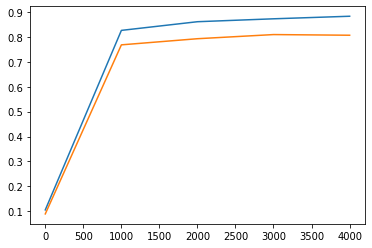

In [16]:
#（TF—IDF）max_features的学习曲线选取最优max_features 【max_features=3500】
import matplotlib.pyplot as plt
score_train=[]
score_test=[]
for i in range(1,5000,1000):
    tv = TfidfVectorizer(stop_words=stopwords,max_features=i,lowercase=False)
    tv.fit(x_train_fenci)
    x_train_tv=tv.transform(x_train_fenci)
    x_test_tv=tv.transform(x_test_fenci)

    mnb.fit(x_train_tv,y_train)
    score_train.append(mnb.score(x_train_tv,y_train))
    score_test.append(mnb.score(x_test_tv,y_test))
plt.plot(range(1,5000,1000), score_train)
plt.plot(range(1,5000,1000), score_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '１２'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '１２'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop w

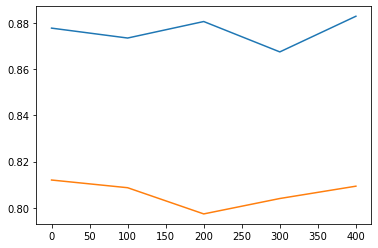

In [17]:
#（train_test_split）random_state的学习曲线  【random_state=0】
score_train=[]
score_test=[]
for i in range(0,500,100):
    x_train,x_test,y_train,y_test=train_test_split(data['新闻内容'],data['类别'],test_size=0.3,random_state=i)
    x_train_fenci=fenci(x_train)
    x_test_fenci=fenci(x_test)
    tv = TfidfVectorizer(stop_words=stopwords,max_features=3500,lowercase=False)
    tv.fit(x_train_fenci)
    x_train_tv=tv.transform(x_train_fenci)
    x_test_tv=tv.transform(x_test_fenci)

    mnb.fit(x_train_tv,y_train)
    score_train.append(mnb.score(x_train_tv,y_train))
    score_test.append(mnb.score(x_test_tv,y_test))
plt.plot(range(0,500,100), score_train)
plt.plot(range(0,500,100), score_test)

In [18]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [19]:
# from sklearn.naive_bayes import MultinomialNB
# mnb=MultinomialNB()

# # (词库表示法)模型训练及得分
# mnb.fit(x_train_cv,y_train)
# mnb.score(x_train_cv,y_train),mnb.score(x_test_cv,y_test)

# #（TF—IDF）模型训练及得分
# mnb.fit(x_train_tv,y_train)
# mnb.score(x_train_tv,y_train),mnb.score(x_test_tv,y_test)